In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data
df = pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
males = df.loc[df['Gender'] == 'Male'].copy()
females = df.loc[df['Gender'] == 'Female'].copy()

In [7]:
females['Height'].head()

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

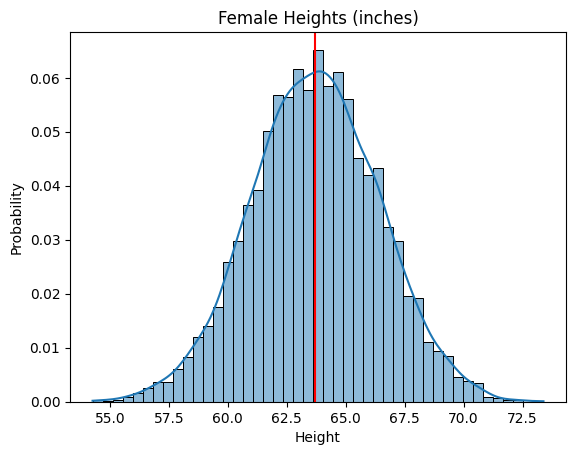

In [12]:
# Plot a histogram of probabalities for female heights
ax = sns.histplot(x = females['Height'], stat = 'probability', kde = True);
ax.axvline(females['Height'].mean(), color = 'red');
ax.set_title('Female Heights (inches)');

In [14]:
# Manually calculate z-scores
mean = females['Height'].mean()
std = females['Height'].std()
z_scores_manual = (females['Height'] - mean) / std
z_scores_manual.head()

5000   -1.779502
5001    0.564198
5002   -0.126014
5003    0.286032
5004   -0.710488
Name: Height, dtype: float64

In [15]:
# Calculate z-scores with scipy
z_scores_scipy = stats.zscore(females['Height'])
z_scores_scipy.head()

5000   -1.779680
5001    0.564255
5002   -0.126027
5003    0.286061
5004   -0.710559
Name: Height, dtype: float64

In [18]:
# Calculate z-scores with StandardScaler
z_scores_scaler = StandardScaler().fit_transform(females[['Height']])
z_scores_scaler[:5]

array([[-1.77967952],
       [ 0.56425475],
       [-0.12602672],
       [ 0.28606073],
       [-0.71055907]])

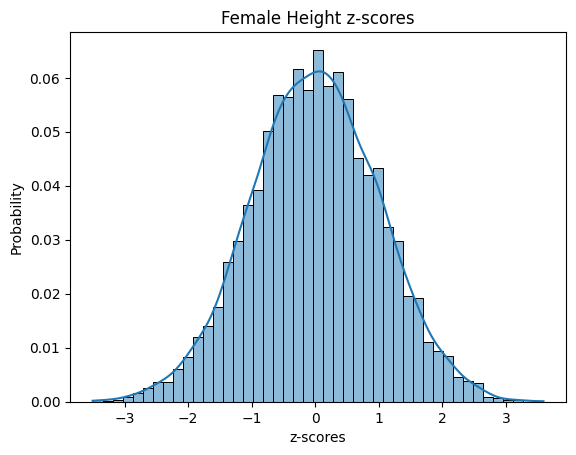

In [20]:
# Plot histogram with z-scores
ax = sns.histplot(x = z_scores_manual, stat = 'probability', kde = True);
ax.set_xlabel('z-scores');
ax.set_title('Female Height z-scores');